# Домашнее задание: классическое машинное обучение

## Взгляд на данные

In [2]:
import pandas as pd

df_shoes = pd.read_csv('Shoes_Data.csv')
df_shoes.head()

,title,price,rating,total_reviews,product_description,reviews,reviews_rating,Shoe Type
0,CLYMB Outdoor Sports Running Shoes for Mens Boy,₹279.00,2.9 out of 5 stars,2389 ratings,Elevate your style with this classy pair of Ru...,Not happy with product|| It's not as expected....,1.0 out of 5 stars|| 1.0 out of 5 stars|| 3.0 ...,Men
1,Bourge Men's Loire-z126 Running Shoes,₹479.00,3.9 out of 5 stars,11520 ratings,The product will be an excellent pick for you....,Memory cushioning in these shoes is the best f...,5.0 out of 5 stars|| 1.0 out of 5 stars|| 5.0 ...,Men
2,T-Rock Men's Sneaker,₹430.00,3.3 out of 5 stars,1251 ratings,Flaunt with these stylish and unique red casua...,Worth to its amount|| Go for it|| Perfect|| 5 ...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men
3,Robbie jones Sneakers Casual Canvas Fabric Col...,₹499.00,4.2 out of 5 stars,3 ratings,Robbie Jones Shoes Are Designed To Keeping In ...,Sup quality|| Good but not expected|| Awesome 👌.!,5.0 out of 5 stars|| 3.0 out of 5 stars|| 5.0 ...,Men
4,Sparx Men's Sd0323g Sneakers,₹499.00,4.2 out of 5 stars,20110 ratings,Sparx is a spectacular range of footwear from ...,Best|| Satisfied!|| Affordable beauty 😘😘😘😘 the...,5.0 out of 5 stars|| 5.0 out of 5 stars|| 5.0 ...,Men


Открываем данные в датафрейме и в текстовом редакторе и смотрим на них. Хватаемся за голову. Во-первых, весь рейтинг, цена и количество отзывов -- строки. Во-вторых, отдельные отзывы -- не отдельные строки! Тоже жуть. Для наших задач понадобятся два датафрейма. В-третьих, далеко не все отзывы -- английские. Тоже важно. Вряд ли мы сможем работать с хинди, урду или корейским = кажется, таких данных не очень много. Хотя можно было бы использовать, например, мультиязыковую модель и справиться с этим, в рамках этого задания придётся справляться по-другому, и есть вероятность, что для малопредставленных в отзывах языках это всё равно будет работать плохо.

### Предобработка текста

Как предобрабатывать? Во-первых, одной из проблем нашего датасета является то, что в нём присутствуют описания и отзывы на других языках, а также символы других языков. Удалим их. (здесь можно было бы принять другие решения в силу того, что у нас небольшой датасет -- например, поопределять языки, переводить сложные случаи или создать им простенький словарь, что-нибудь ещё подобное. Можно было бы даже оставить так и надеяться, что это не помешает) Но давайте всё-таки попробуем удалить). Также приведём слова к одной форме, потому что у нас не очень много текстов, и к одному регистру -- некоторые любят использовать капс, а также вряд ли мы хотим, чтобы слово из начала предложения отличалось от другого такого же, но написанного с маленьой буквы -- даже в начале предложения.  
</br>
</br>
Также уберём стоп-слова, так как вряд ли они будут значимы, а фич нам необходимо отобрать не очень много. Аналогично со знаками препинания и всем прочим, что в результате не является словом, например, с цифрами, которые могут означать много что и могут не быть полезны для нашей задачи. В идеале, конечно, каждый этап неплохо бы проверять, потому что иногда бывают неожиданные результаты, но это удлиннило бы тетрадку в несколько раз и заняло бы много времени.

In [3]:
import re
import nltk
nltk.download('wordnet')
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet, stopwords

lemmatizer = WordNetLemmatizer()
stops = set(stopwords.words('english'))

def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def clean_text(text, lemmatizer=lemmatizer, stops=stops):
    lemms = []
    words = word_tokenize(text)
    for word in words:
        word = word.lower()
        if re.match('[a-z0-9]*(\' -)?[a-z0-9]+', word) and word not in stops:
            lemma = lemmatizer.lemmatize(word, get_wordnet_pos(word))
            lemms.append(lemma)

    return ' '.join(lemms)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\M\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Разделяем отзывы, потому что в ячейках изначального датафрейма все отзывы к одной модели обуви в одной ячейке

In [4]:
all_reviews = []
all_reviews_rating = []
for i1, reviews in enumerate(df_shoes['reviews']):
    new_reviews = reviews.split('||')
    reviews_rating = df_shoes['reviews_rating'][i1].split('||')
    for i2, element in enumerate(new_reviews):
        all_reviews.append(clean_text(element))
        all_reviews_rating.append(int(reviews_rating[i2].split('.')[0]))

In [5]:
df_shoes_2 = pd.DataFrame()
df_shoes_2['reviews'] = all_reviews
df_shoes_2['reviews_rating'] = all_reviews_rating
df_shoes_2

,reviews,reviews_rating
0,happy product,1
1,expect,1
2,average product,3
3,pic beautiful,3
4,get damage product quality average 300₹,3
...,...,...
9953,go,5
9954,excellent product,5
9955,nice shoe,5
9956,nice,5


Готово! Посмотрим, что получилось

## Анализ

In [6]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Итак, посмотрим на сбалансированность. Так себе сбалансированность, класса 2 едва ли не в десять раз меньше, чем класса 5. Восхитительно. В целом почему-то много положительных отзывов, с пятью звёздами -- больше всего. Но вот отличаются ли эти отзывы от остальных -- вот в чём вопрос.

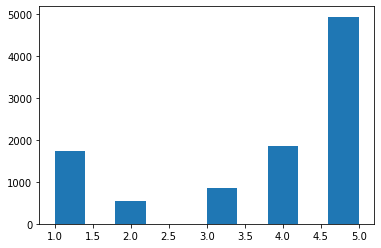

In [7]:
plt.hist(df_shoes_2['reviews_rating'])
plt.show()

Ничего нового, сосчитали длину датафрейма, поняли, что среднее у нас около четырёх. Статистически -- а где нормальное распределение, фактически -- так оно обычно и бывает. Никакого нам нормального распределения, скорее наоборот, краёв больше, чем середины 

In [8]:
df_shoes_2.describe()

,reviews_rating
count,9958.000000
mean,3.772645
std,1.527403
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


### Отличия классов

А теперь давайте смотреть, отличаются ли вообще классы! У нас есть слова, их и будем анализировать.

In [171]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def print_wordclouds(raiting, graph_title):
    text_cloud = ' '.join(df_shoes_2[df_shoes_2['reviews_rating'] == raiting]['reviews'])

    wordcloud = WordCloud(
        background_color ='white',
        width = 800,
        height = 400, 
    ).generate(text_cloud)

    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud)
    plt.axis("off") 
    plt.title(graph_title)
    plt.show()

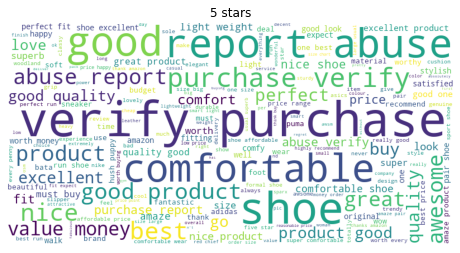

In [172]:
print_wordclouds(5, '5 stars')

Пять звёзд. Первое, что хочется отметить -- разнообразность частотных слов. Во-первых, даже не очень удивительно, учитывая количество, но видимо, пользователи чаще употребляют разные слова, а не одинаковые, и возможно, описывают плюсы-минусы. Не очень ожидаемо для пяти звёзд, но ладно. 

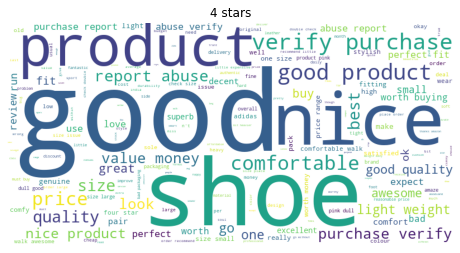

In [173]:
print_wordclouds(4, '4 stars')

Четыре звезды. Гораздо менее разнообразно, чем предыдущее. Мы вступаем в мир Просто Хорошей Обуви. Особенное сказать сложнее.

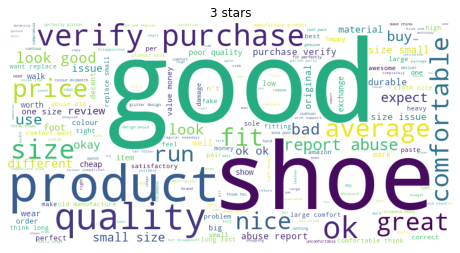

In [174]:
print_wordclouds(3, '3 stars')

Три звезды. Покажи мне кто-нибудь этот график вместе с предыдущим -- я бы не сказала, где какой. Скажут ли модели -- посмотрим

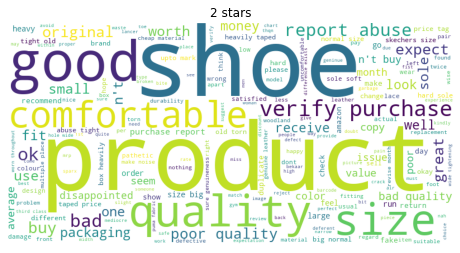

In [175]:
print_wordclouds(2, '2 stars')

Две звезды. Удивительно, но почти аналогично. Ибо даже в двух звёздах "хороший" встречается чаще, чем "плохой". Зато размер выступает на первый план, возможно, потому что не подходит.

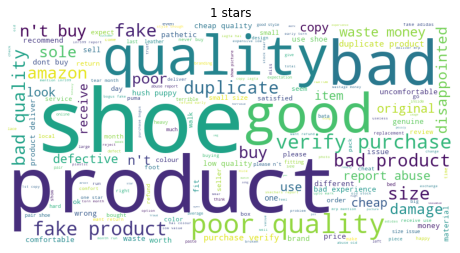

In [176]:
print_wordclouds(1, '1 stars')

Ура, мы видим слово "плохой"! Но, к сожалению для классификации, наравне с "хороший". Также упоминается fake, чего раньше замечено не было.

У нас есть какие-то различия, но между соседними классами они могут не дифференциироваться чётко. Будь задача настоящей, наверное, стоило бы подумать над её формулировкой: вероятно, имело бы смысл слить в один классы 1 и 2 и классы 3 и 4. И несбалансированность бы победили во многом, и отзывы разделялись бы вернее: отлично, сойдёт и плохо. Но у нас задача учебная -- попробуем так.

## Векторизация

In [21]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

Векторизуем тексты. Попробуем и Tf-Idf, и Count. Также попробуем разбиение и по словам, и по n-граммам. Почему такое ограничение по фичам -- у нас текстов не так много и они короткие. Если взять хоть пять тысяч, это уже половина датасета будет, и нас ждёт переобучение

In [30]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

tfidf_ngrams = TfidfVectorizer(max_features=200, min_df=5,analyzer='char', ngram_range=(3,3), max_df=0.4)
tfidf_words = TfidfVectorizer(max_features=200, min_df=5,analyzer='word', max_df=0.4)
cnt_ngrams = CountVectorizer(max_features=200, min_df=5,analyzer='char', ngram_range=(3,3), max_df=0.4)
cnt_words = CountVectorizer(max_features=200, min_df=5,analyzer='word', max_df=0.4)

X_tfidf_ngrams = tfidf_ngrams.fit_transform(df_shoes_2['reviews']).toarray()
X_tfidf_words = tfidf_words.fit_transform(df_shoes_2['reviews']).toarray()
X_cnt_ngrams = cnt_ngrams.fit_transform(df_shoes_2['reviews']).toarray()
X_cnt_words = cnt_words.fit_transform(df_shoes_2['reviews']).toarray()
Y = df_shoes_2['reviews_rating']

In [52]:
X_train, X_test, Y_train, Y_test = train_test_split(X_cnt_words, Y.values, train_size=0.7, random_state = 23)

In [77]:
all_data = {'tfidf_ngrams': X_tfidf_ngrams, 'tfidf_words': X_tfidf_words, 
             'cnt_ngrams': X_cnt_ngrams, 'cnt_words': X_cnt_words}

Создадим эту полезную структуру со всеми вариантами иксов (потому что игрек мы никак не изменяли и он у них у всех один). Далее пригодится

## Модели

In [46]:
#!pip install catboost
import catboost

In [60]:
boosting_model = catboost.CatBoostClassifier(n_estimators=20)

boosting_model.fit(X_train, Y_train)

Learning rate set to 0.5
0:	learn: 1.3544308	total: 35.2ms	remaining: 669ms
1:	learn: 1.2760809	total: 68.2ms	remaining: 614ms
2:	learn: 1.2270149	total: 105ms	remaining: 592ms
3:	learn: 1.2084873	total: 155ms	remaining: 621ms
4:	learn: 1.1938699	total: 216ms	remaining: 649ms
5:	learn: 1.1838366	total: 258ms	remaining: 602ms
6:	learn: 1.1758691	total: 285ms	remaining: 529ms
7:	learn: 1.1580824	total: 323ms	remaining: 485ms
8:	learn: 1.1494846	total: 358ms	remaining: 437ms
9:	learn: 1.1403322	total: 424ms	remaining: 424ms
10:	learn: 1.1350900	total: 463ms	remaining: 378ms
11:	learn: 1.1291558	total: 495ms	remaining: 330ms
12:	learn: 1.1239100	total: 530ms	remaining: 286ms
13:	learn: 1.1180534	total: 580ms	remaining: 249ms
14:	learn: 1.1142164	total: 650ms	remaining: 217ms
15:	learn: 1.1097788	total: 692ms	remaining: 173ms
16:	learn: 1.1059947	total: 732ms	remaining: 129ms
17:	learn: 1.1018348	total: 807ms	remaining: 89.7ms
18:	learn: 1.0958708	total: 891ms	remaining: 46.9ms
19:	learn: 1

In [61]:
y_train_predicted = boosting_model.predict(X_train)
y_test_predicted = boosting_model.predict(X_test)

In [62]:
from collections import Counter
Counter(y_test_predicted.transpose().tolist()[0])

Counter({5: 2544, 1: 333, 4: 52, 3: 57, 2: 2})

In [105]:
Counter(Y_test.tolist())

Counter({4: 349, 5: 995, 3: 195, 1: 358, 2: 95})

In [65]:
from sklearn.metrics import f1_score

f1_score(Y_test, y_test_predicted, average="weighted")

0.5038034631179592

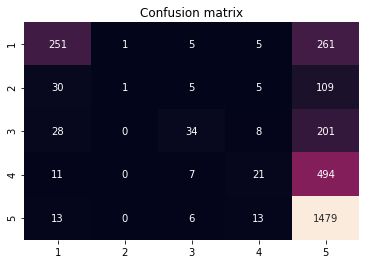

In [66]:
from sklearn.metrics import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

categories = [1, 2, 3, 4, 5]
sns.heatmap(data=confusion_matrix(Y_test, y_test_predicted), annot=True, fmt="d", 
            cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()

Ну в общем-то, всё средненько. Посмотрим, что с гридсёрчем получится.

## Sklearn и гридсёрч

In [79]:
from sklearn.model_selection import GridSearchCV

Это функция, которая пригождается в обеих задачах и считает всё внутри себя. Для каждого из четырёх наших наборов данных происходит следующее: набор делится на train и test в соотношении 0.8, на трейне с помощью гридсёрча происходит обучение всех вариантов моделей по заданным параметрам и из них выбирается лучшая, далее она обучается на всём трейне целиком и на тесте оценивается по данным метрикам. В итоге мы получаем напечатанные данные о лучшей модели данного вида для каждого из четырёх наборов данных и можем повторить её, обучив на том же трейне с теми же заданными параметрами. Почему не используется параметр перемешивания данных в разделении на трейн и тест, хотя я говорила о важности этого процесса? Потому что в качестве разделния данных используется не просто откусывание части датаасета, а функция train_test_split, которая перемешивает их по умолчанию.

In [92]:
def gridsearch_for_all_data(all_data, answers, template_model, param_grid):
    for name_data, data in all_data.items():
        model = template_model
        X_train, X_test, Y_train, Y_test = train_test_split(data, answers.values, train_size=0.8, random_state = 42)
        grid_model = GridSearchCV(model, param_grid)
        print('*************************************')
        grid_model.fit(X_train, Y_train)
        preds = grid_model.predict(X_test)
        print(name_data)
        print(grid_model.best_params_)
        print(grid_model.best_estimator_)
        print('F1')
        print(f1_score(Y_test, preds, average="weighted"))

### Логистическая регрессия

In [93]:
from sklearn.linear_model import LogisticRegressionCV
param_grid = {
    'max_iter': [100, 150, 200]
}
logreg = LogisticRegressionCV(multi_class='multinomial', solver='newton-cg', class_weight='balanced')
gridsearch_for_all_data(all_data, Y, logreg, param_grid)

*************************************


C:\Users\M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\U

tfidf_ngrams
{'max_iter': 100}
LogisticRegressionCV(Cs=10, class_weight='balanced', cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='newton-cg', tol=0.0001, verbose=0)
F1
0.47496747645766024
*************************************


C:\Users\M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\U

tfidf_words
{'max_iter': 100}
LogisticRegressionCV(Cs=10, class_weight='balanced', cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='newton-cg', tol=0.0001, verbose=0)
F1
0.4995983042061086
*************************************


C:\Users\M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\U

cnt_ngrams
{'max_iter': 100}
LogisticRegressionCV(Cs=10, class_weight='balanced', cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='newton-cg', tol=0.0001, verbose=0)
F1
0.47760160162136495
*************************************


C:\Users\M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\U

cnt_words
{'max_iter': 100}
LogisticRegressionCV(Cs=10, class_weight='balanced', cv='warn', dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='multinomial', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='newton-cg', tol=0.0001, verbose=0)
F1
0.504500690671618


### Случайный лес

Кажется странным выбором, но если хорошо его ограничить -- может сработать как один из лучших на выборке с дисбалансом классов

In [95]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators': (50, 100, 150, 200),
              'max_depth': (5, 7, 10, 15, 20),
              'min_samples_split': (2, 3, 4), 
              'min_samples_leaf': (1, 2, 3)
              #'max_leaf_nodes': (None, 5, 6, 10),
              #'class_weight': (None, 'balanced', {1: 3, 2: 8, 3: 6, 4: 3, 5: 1})
}

gridsearch_for_all_data(all_data, Y, RandomForestClassifier(), param_grid)

*************************************


C:\Users\M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


tfidf_ngrams
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
F1
0.5432118511290535
*************************************


C:\Users\M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


tfidf_words
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 150}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
F1
0.5204538557903501
*************************************


C:\Users\M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


cnt_ngrams
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
F1
0.5387850072498094
*************************************


C:\Users\M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


cnt_words
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=20, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
F1
0.5138625074332294


### Мультиномиальный Байес

Как мы видели на паре, с текстовыми задачами может работать очень хорошо. А ещё обучается быстро!

In [127]:
from sklearn.naive_bayes import MultinomialNB

param_grid = {'alpha': [0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75]}

gridsearch_for_all_data(all_data, Y, MultinomialNB(), param_grid)

*************************************


C:\Users\M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


tfidf_ngrams
{'alpha': 1.0}
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
F1
0.5069092407041286
*************************************


C:\Users\M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


tfidf_words
{'alpha': 0.25}
MultinomialNB(alpha=0.25, class_prior=None, fit_prior=True)
F1
0.5476016637040906
*************************************


C:\Users\M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


cnt_ngrams
{'alpha': 0.5}
MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)
F1
0.49312166250318357
*************************************


C:\Users\M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


cnt_words
{'alpha': 1.5}
MultinomialNB(alpha=1.5, class_prior=None, fit_prior=True)
F1
0.5505519561059737


### Классификатор SGD

Интересно попробовать. Стохастический градиентный спуск, может сработать неплохо

In [177]:
from sklearn.linear_model import SGDClassifier

param_grid = {'penalty': ('l2', 'elasticnet'), 
              'alpha': (0.0001, 0.001),
              'l1_ratio': (0.15, 0.3, 0.4, 0.5),
              'max_iter': (500, 1000, 1500)}

gridsearch_for_all_data(all_data, Y, SGDClassifier(), param_grid)

*************************************


C:\Users\M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


tfidf_ngrams
{'alpha': 0.0001, 'l1_ratio': 0.4, 'max_iter': 1000, 'penalty': 'l2'}
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.4, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
F1
0.5240653783735719
*************************************


C:\Users\M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


tfidf_words
{'alpha': 0.0001, 'l1_ratio': 0.4, 'max_iter': 1500, 'penalty': 'elasticnet'}
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.4, learning_rate='optimal', loss='hinge',
              max_iter=1500, n_iter_no_change=5, n_jobs=None,
              penalty='elasticnet', power_t=0.5, random_state=None,
              shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
              warm_start=False)
F1
0.5405743598514798
*************************************


C:\Users\M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


cnt_ngrams
{'alpha': 0.001, 'l1_ratio': 0.5, 'max_iter': 500, 'penalty': 'l2'}
SGDClassifier(alpha=0.001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.5, learning_rate='optimal', loss='hinge', max_iter=500,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)
F1
0.5074869322194209
*************************************


C:\Users\M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


KeyboardInterrupt: 

## Оценка результатов

Сначала -- плохой пример. Что будет, если мы будем давать ответы случайно или выбирая всегда самый частый класс? Давайте посмотрим на метрики.

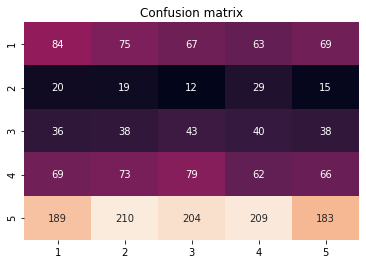

F1
0.2202448592910486
0.19628514056224897
0.17457891096585879


In [128]:
import random
categories = [1, 2, 3, 4, 5]
random_data = [random.randint(1, 5) for i in range(len(Y_test))]
sns.heatmap(data=confusion_matrix(Y_test, random_data), annot=True, fmt="d", 
            cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()
print('F1')
print(f1_score(Y_test, random_data, average="weighted"))
print(f1_score(Y_test, random_data, average="micro"))
print(f1_score(Y_test, random_data, average="macro"))

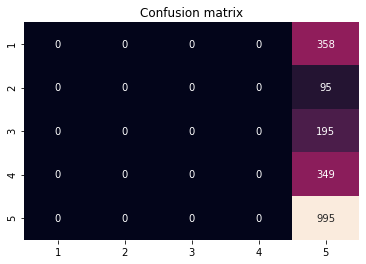

F1
0.3327756960214477
0.4994979919678715
0.13324405758285907


In [159]:
categories = [1, 2, 3, 4, 5]
main_data = [5 for i in range(len(Y_test))]
sns.heatmap(data=confusion_matrix(Y_test, main_data), annot=True, fmt="d", 
            cbar=False, xticklabels=categories, yticklabels=categories)
plt.title("Confusion matrix")
plt.show()
print('F1')
print(f1_score(Y_test, main_data, average="weighted"))
print(f1_score(Y_test, main_data, average="micro"))
print(f1_score(Y_test, main_data, average="macro"))

Ожидаемо, ничего хорошего мы здесь не получили. Но зато теперь можем сравнить наши результаты со случайными и с предсказанием самого частого класса!

In [162]:
def validate_results(model, data, answers):
    
    X_train, X_test, Y_train, Y_test = train_test_split(data, Y.values, 
                                                        train_size=0.8, random_state = 23)
    model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    
    categories = [1, 2, 3, 4, 5]
    sns.heatmap(data=confusion_matrix(Y_test, preds), annot=True, fmt="d", 
                cbar=False, xticklabels=categories, yticklabels=categories)
    plt.title("Confusion matrix")
    plt.show()
    print('F1 weighted: ', f1_score(Y_test, preds, average="weighted"))
    print('F1 micro:    ', f1_score(Y_test, preds, average="micro"))
    print('F1 macro:    ', f1_score(Y_test, preds, average="macro"))

Функция для удобной проверки результатов. У нас несколько моделей из одной библиотеки и с одним интерфейсом, поэтому почему бы не написать её и не повторять один и тот же код. Меньше тетрадка, если что-то меняем в отображении, то не надо менять каждой модели отдельно. Во случае моделей с разным сценарием запуска/с разными графиками такое бы, конечно, не прошло, но здесь -- почему нет

### Логистическая регрессия

C:\Users\M\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\M\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\M\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\M\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\M\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to conve

C:\Users\M\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\M\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\M\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\M\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


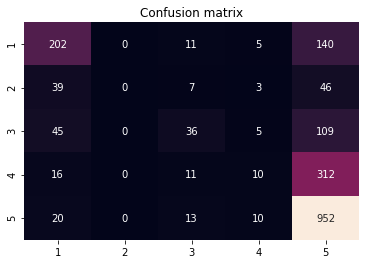

F1 weighted:  0.5141389122940649
F1 micro:     0.6024096385542169
F1 macro:     0.3311414381877497


C:\Users\M\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [166]:
validate_results(LogisticRegressionCV(max_iter=100), all_data['cnt_words'], Y)

Ни одного экземпляра класса 2. Здесь лучше делать что-нибудь с датасетом -- например, то, что мной предлагалось в начале, слить классы в три. Или дублировать все классы, кроме 5 (но рискованно). Но это уже сильно лучше случайных элементов или одного класса, и не сильно хуже остальных. Возможно, ей стоит попробовать дать больше данных на трейн и меньше на тест

### Случайный лес

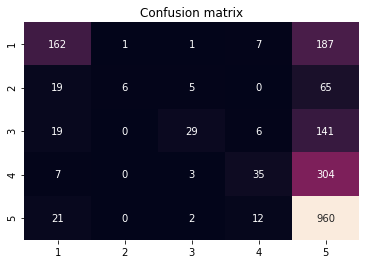

F1 weighted:  0.5207508729972761
F1 micro:     0.5983935742971888
F1 macro:     0.3624975276118759


In [165]:
validate_results(RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=50),
                 all_data['tfidf_ngrams'], Y)

Метрики лучше, второй класс предсказывается, показатели неплохи -- кажется, не переобучился

### Байесовский классификатор

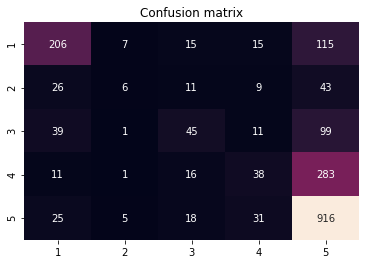

F1 weighted:  0.5484318204801159
F1 micro:     0.6079317269076305
F1 macro:     0.3878234276186586


In [164]:
validate_results(MultinomialNB(alpha=1.5), all_data['cnt_words'], Y)
#0.5505519561059737

Математика! И прекрасные среди этих моделей результаты, лучше всех по метрикам. По виду тоже хорошо -- оценок по диагонали больше, иных меньше...

### Классификатор SGD

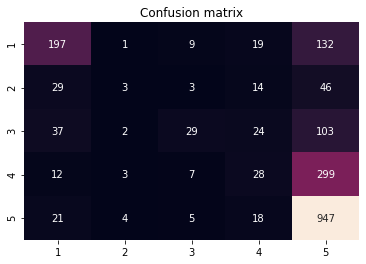

F1 weighted:  0.5306394156123474
F1 micro:     0.6044176706827309
F1 macro:     0.3533516177104253


In [178]:
validate_results(SGDClassifier(alpha=0.0001, l1_ratio=0.4, max_iter=1500, penalty='elasticnet'), all_data['tfidf_words'], Y)

Тоже вполне ничего -- чуть лучше случайного леса, чуть хуже байеса. Больше того, что отнесено к пятому классу, чем у последнего

## Краткие итоги

Если бы из этих моделей пришлось выбирать оптимальную, выбран, конечно, был бы байес. Но при этом и результаты остальных не сильно от него отстают. В итоге -- примерно одинаковые скоры, значит, улучшить их можно уже только через данные и их обработку, но не через модель. Здесь бы их удвоить в классах, кроме 5 илм объединить, или попробовать отказаться от части 5 -- вдруг сработает?